# Convolutional Neural Networks (CNN)  
In this notebook i demonstrate how 2d Convolutional layer works  

[ref](https://indoml.com/2018/03/07/student-notes-convolutional-neural-networks-cnn-introduction/)

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
source = np.array([
    [0,1,2,3],
    [10,11,12,13],
    [20,21,22,23],
    [30,31,32,33],
    [40,41,42,43]
])

kernel = np.array([
    [0,1,2],
    [10,11,12],
    [20,21,22]
])

In [3]:
source.shape

(5, 4)

In [4]:
def conv2D(source, kernal):
    return np.sum(source * kernal)

In [5]:
print("Source sub matrix")
print(source[0: 0+kernel.shape[0], 0 : 0+kernel.shape[1]])
print("Kernel matrix")
print(kernel)
print("Element wise matrix multiply of kernel & source")
print(kernel * source[0: 0+kernel.shape[0], 0 : 0+kernel.shape[1]])
print("sum of matrix multiply result")
print(np.sum(kernel * source[0: 0+kernel.shape[0], 0 : 0+kernel.shape[1]]))

Source sub matrix
[[ 0  1  2]
 [10 11 12]
 [20 21 22]]
Kernel matrix
[[ 0  1  2]
 [10 11 12]
 [20 21 22]]
Element wise matrix multiply of kernel & source
[[  0   1   4]
 [100 121 144]
 [400 441 484]]
sum of matrix multiply result
1695


In [6]:
'''
This Function is responsible for slide entire image and return convolutional image
source -> source image numpy matrix
kernel -> numpy kernel matrix
stride and padding is not implemented in this function
'''
def img_slide(source, kernel):
    '''
    Result image size calculation
    row = (source_row - kernel_row + 1)
    column = (source_column - kernel_column + 1)
    '''
    r = 0
    c = 0
    row = (source.shape[0] - kernel.shape[0] + 1)
    column = (source.shape[1] - kernel.shape[1] + 1)
    result_mat = np.zeros((row,column))
    
    while r < row:
        c = 0
        while c < column:
            result_mat[r,c] = conv2D(source[r: r+kernel.shape[0], c : c+kernel.shape[1]], kernel)
            c += 1
        r += 1
    
    return result_mat

In [7]:
img_slide(source,kernel)

array([[1695., 1794.],
       [2685., 2784.],
       [3675., 3774.]])

shape :  (731, 1300)


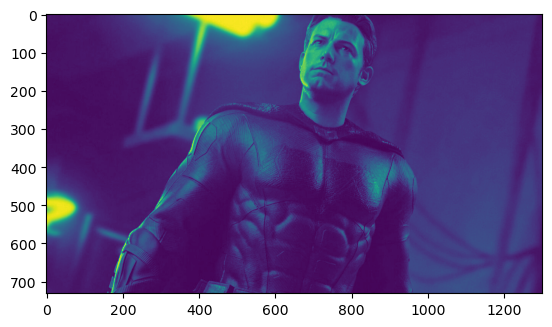

In [8]:
img = cv2.imread("/mnt/Project/mlTask/CNN/assest/batman.jpg", 0)
print("shape : ",img.shape)
plt.imshow(img)

In [9]:
kernel = np.array(
    [
    [0,-1,0],
    [-1,5,-1],
    [0,-1,0]
    ]
)

Res img shape :  (729, 1298)


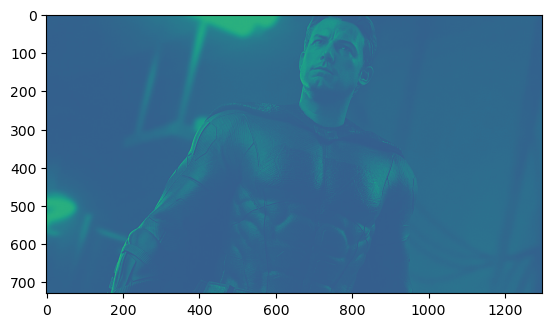

In [10]:
res_img = img_slide(img, kernel)
print("Res img shape : ",res_img.shape)
plt.imshow(res_img)

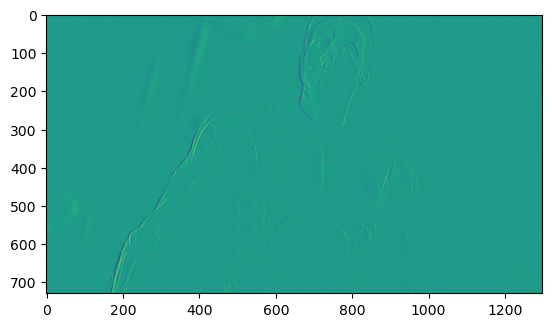

In [11]:
#Vertical edge detect kernal

ver_edge_kernel = np.array(
    [
    [1,0,-1],
    [1,0,-1],
    [1,0,-1]
    ]
)
plt.imshow(img_slide(img, ver_edge_kernel))

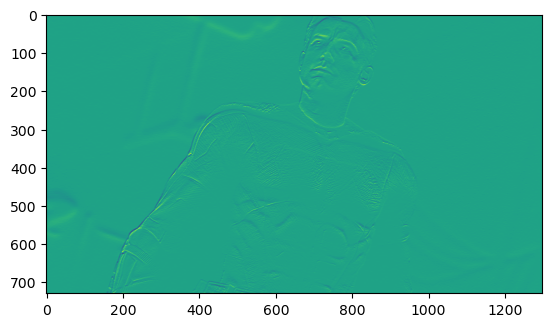

In [12]:
#Horizontal edge detect kernal
hor_edge_kernel = np.array(
    [
    [1,1,1],
    [0,0,0],
    [-1,-1,-1]
    ]
)
plt.imshow(img_slide(img, hor_edge_kernel))

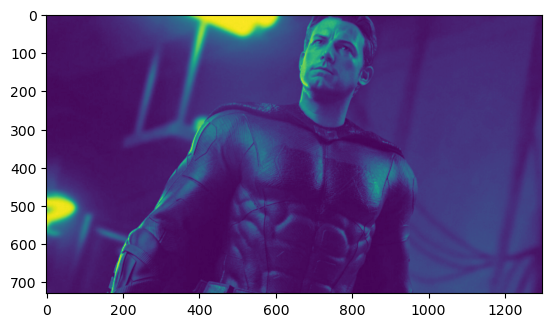

In [13]:
#Gaussian blur kernel
gaus_blur_kernel = np.array(
    [
    [1/16., 1/8., 1/16.],
    [1/8., 1/4., 1/8.],
    [1/16., 1/8., 1/16.]
    ]
)
plt.imshow(img_slide(img, gaus_blur_kernel))

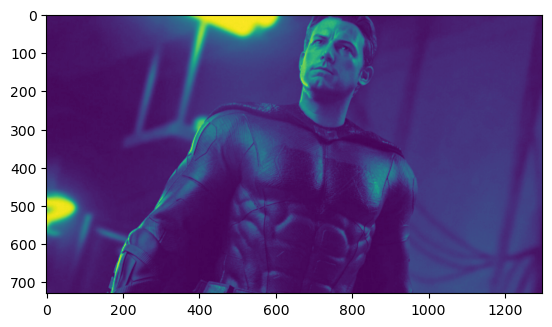

In [14]:
gaus_blur_kernel = np.array(
    [
    [1/32., 1/16., 1/32.],
    [1/16., 1/24., 1/16.],
    [1/33., 1/16., 1/32.]
    ]
)
plt.imshow(img_slide(img, gaus_blur_kernel))